**this is a template notebook for Assignment 2 on Clustering. To get a 60 you will need to complete chapter 1 and 2.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>\<Start type classification>
Author: <span style='background:yellow'>\<Jaimy monsuur\></span><br>
Student number: <span style='background:yellow'>\<668040\></span><br>
Date: <span style='background:yellow'>\<24/03/2023\></span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* matplotlib
* seaborn
* sklearn

From these we will need the following libraries:

In [190]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')

# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')

try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('seaborn was not installed, installed and imported')

import sklearn



NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
seaborn already installed, only imported


# 1. The Data
We are going to use the datafile **<span style ='background:yellow'>\<Start.csv\></span>**. This contains data from **<span style ='background:yellow'>\<in file about dataset\></span>**.

In [191]:
# enter the code to load the data
data = pd.read_csv('Stars.csv', sep=',')


Here's a quick look at the data:

In [192]:
# enter the code to see the first few rows of the data
data.head()


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0



I will use the following variables:
x1 = L Relative Luminosity, x2 = R Relative Radius, y = Star Type, Temperatur
the relative luminosity is the luminosity of the star compared to the sun, the relative radius is the radius of the star compared to the sun and the star type is the type of star it is.

these are the star types:

    Red Dwarf - 0
    Brown Dwarf - 1
    White Dwarf - 2
    Main Sequence - 3
    Super Giants - 4
    Hyper Giants - 5

The categorical dependent variable <span style ='background:yellow'>\<your y variable name></span> has the following categories:

In [193]:
# code that returns the different categories in the y variable.
categories = data['Type'].unique()
categories

array([0, 1, 2, 3, 4, 5], dtype=int64)

We'll also need some training and testing data, so:

In [194]:
# code to split data in training and testing
from sklearn.model_selection import train_test_split
X = data[['L', 'R']]
y = data['Type']

# turn x and y in to numpy arrays
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

array([[1.00000e+05, 1.28900e+03],
       [2.94903e+05, 1.78300e+03],
       [3.40000e-04, 9.18000e-02],
       [1.27800e+03, 5.68000e+00],
       [8.49420e+05, 1.25200e+03],
       [1.30000e-03, 2.56000e-01],
       [6.30000e-01, 8.76000e-01],
       [7.40000e+01, 2.89000e+00],
       [2.72830e+05, 1.35600e+03],
       [9.98000e+02, 6.21000e+00],
       [2.82000e+05, 1.53400e+03],
       [3.42900e+05, 3.00000e+01],
       [1.00000e-03, 3.50000e-01],
       [1.73800e+05, 6.23700e+00],
       [5.90000e-01, 9.10000e-01],
       [3.82993e+05, 1.49400e+03],
       [1.22000e-03, 1.14000e-02],
       [1.67900e+04, 6.40000e+00],
       [1.80000e-03, 1.60000e-01],
       [8.83000e+02, 5.65300e+00],
       [4.37000e-04, 8.56000e-02],
       [8.80000e-03, 3.50000e-01],
       [1.38000e-04, 1.03000e-01],
       [1.84000e+05, 3.60000e+01],
       [6.70000e-04, 1.90000e-01],
       [1.24500e+04, 6.36000e+00],
       [2.72000e+05, 1.18300e+03],
       [3.20000e-04, 9.30000e-02],
       [8.10000e-04,

All set, lets try to predict this using our independent variables **<span style ='background:yellow'>\<your x variables names></span>**

# 2. The Basic Classification Models

In the Jupyter Notebook from lecture 5 a few different Clustering techniques were discussed. Lets explore how these perform on the data.

Before we look at some 'real' models, its a good idea to get a baseline in by using one or more of the dummy classifiers. Lets see how they perform:

accuracy score: 0.125


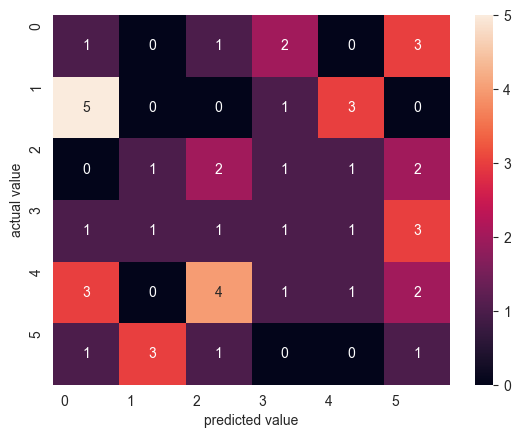

In [195]:
from sklearn import metrics
# code to create, fit and measure the dummy classifiers (see chapter 5.4. in the lecture notebook)
# include both the accuracy score and the confusion matrix for each.
from sklearn.dummy import DummyClassifier
data["Type"] = pd.Categorical(data["Type"])
labels = data['Type'].cat.categories
k = len(labels)

dumUni = DummyClassifier(strategy="uniform")
dumUni.fit(X_train, y_train)
y_pred = dumUni.predict(X_test)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

dummy classifier with strategy 'uniform'
this classifier predicts the labels at random, so the accuracy score should not be higher than 1/k, where k is the number of classes. this means 1/6 = 0.1667, this is also the accuracy score that we get most of the time if we run the code a few times.
i got: accuracy score: 0.16666666666666666
the confusion matrix shows that the classifier predicts the labels at random, because the is no clear diagonal line in the matrix.



accuracy score: 0.125


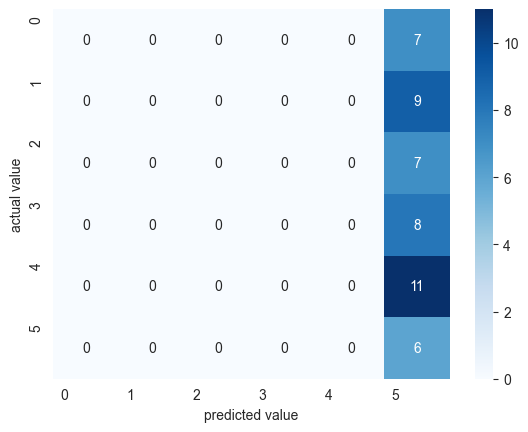

In [196]:
dumPrior = DummyClassifier(strategy="prior")
dumPrior.fit(X_train, y_train)
y_pred = dumPrior.predict(X_test)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

dummy classifier with strategy 'prior'
this classifier always predicts the most frequent label in the training set. This meant that the accuracy will always be the same. in this case it is 0.125. or 12.5%
in hte confusion matrix we can see that it only pre dict label 5, this means that that is the most frequent label in the training set.

So, those are our 'baseline'. A model should be able to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed was the Naive Bayes model. 

**<span style ='background:yellow'>\<explain briefly in your own words how a Naive Bayes method works></span>**

Naive Bayes is a classification algorithm for classification. It is called naive because it assumes that the features are independent of each other. so it does not account for the correlation of 2 features. the algorithm calculates the probability of a class based on a feature or x variable. it calculates this for every x variable that we give it, and then it multiplies all the probabilities together. the output is hte class with the highest probability.

Lets create and fit this model:

In [197]:
# code to create the model, and fit the data.
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Now to measure its performance:

accuracy score: 0.7083333333333334


<Axes: >

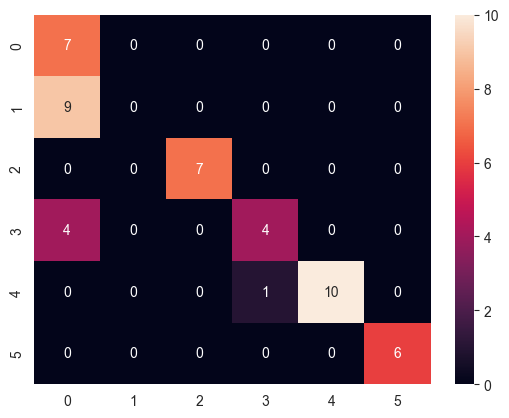

In [198]:
# code to show its accuracy score AND confusion matrix.
y_pred = model.predict(X_test)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d')


**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers?></span>**
the accuracy is 0.708 this is way better that the dummy models. in the confusion matrix we can see that it is not good at prediction the label 0,1, but it is good at predicting label 2,4,5, i can also see from i that it confuses label 0 with 1 and 3

Lets also have a look at what a prediction would be if L=20000 and R=1000: i picked the and i expect it to be label 5.

In [199]:
# code to show the prediction
x_1 = 20000
x_2 = 1000
x_testing = np.array([[x_1, x_2]])
y_pred = model.predict(x_testing)
print('predicted label:', y_pred[0])


predicted label: 5


my prediction was correct.

That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.

**<span style ='background:yellow'>\<explain briefly in your own words how a SVM method works></span>**
 Support Vector Machines  are a type of machine learning algorithm used for classification analysis. The idea behind it is to find the best possible line or hyperplane that can separate two or more classes of data.

They aim to find the line that maximizes the margin, in this case the margin is the  distance between the line and the closest data points of each class. when predicting it will place the new data point on the side of the line that it belongs to and classify it as such.

The basic kernel is the linear one, so we'll attempt that first:

In [200]:
# code to create the model, and fit the data.
# Import the required SVC package from sklearn
from sklearn.svm import SVC

# Create the model, then fit the model, and determine the predicted values
svmLin = SVC(kernel='linear')
svmLin.fit(X_train, y_train)
y_pred = svmLin.predict(X_test)
print("the predicted values are: ")
y_pred

the predicted values are: 


array([4, 1, 3, 0, 4, 4, 3, 4, 3, 1, 0, 2, 2, 3, 5, 1, 2, 5, 4, 0, 4, 5,
       2, 0, 0, 2, 1, 3, 0, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 1, 3, 4, 3, 0,
       4, 0, 3, 2], dtype=int64)

Measuring its performance....

accuracy score: 0.8125


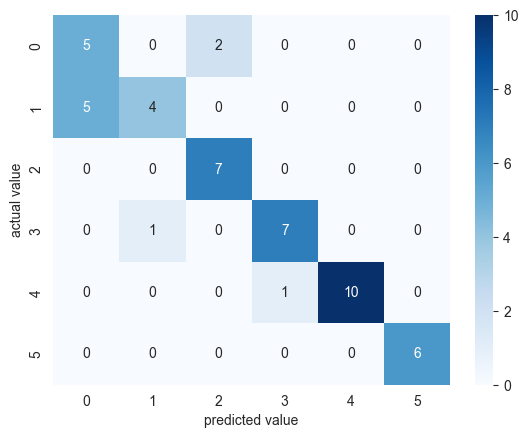

In [201]:
# code to show its accuracy score AND confusion matrix.
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
# The confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, and the NB?></span>**
the accuracy of this model is 0.813, or 81.3%. this is wat better than the dummy models because those did not reach or almost never reached more that 20% accuracy. it is also beter that the naive bayes model that was stuck around 70% accuracy.from the confusion matrix we can see that it is good at predicting becouse we can see a diagonal line from the top left to the bottom right. how ever we can aso see that it is confusing label 0 with label 1.

Lets do the same for the other kernels that were discussed, i.e. rbf, polynomial, and sigmoid.

results rbf
accuracy score: 0.4166666666666667


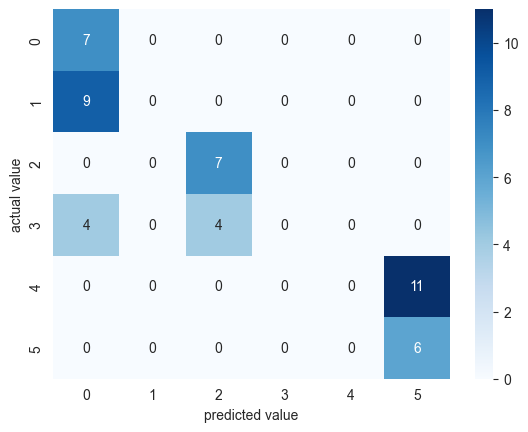

results polynomial
accuracy score: 0.25


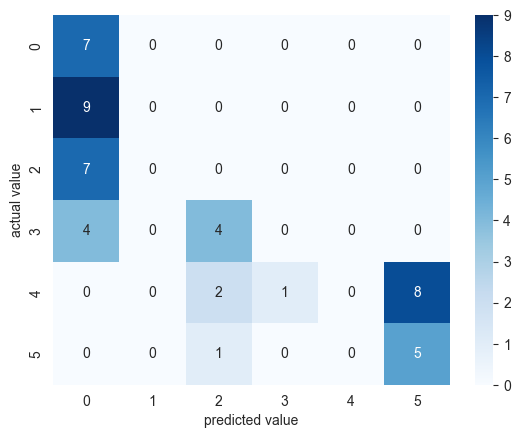

results sigmoid
accuracy score: 0.4583333333333333


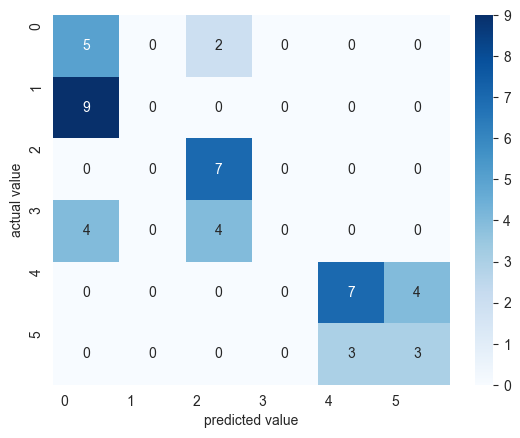

In [202]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.
print('results rbf')
# Create the model, then fit the model, and determine the predicted values
svmLin = SVC(kernel='rbf')
svmLin.fit(X_train, y_train)
y_pred = svmLin.predict(X_test)

# code to show its accuracy score AND confusion matrix.
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
# The confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()


print('results polynomial')
# Create the model, then fit the model, and determine the predicted values
svmLin = SVC(kernel='poly')
svmLin.fit(X_train, y_train)
y_pred = svmLin.predict(X_test)

# code to show its accuracy score AND confusion matrix.
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
# The confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

print('results sigmoid')
# Create the model, then fit the model, and determine the predicted values
svmLin = SVC(kernel='sigmoid')
svmLin.fit(X_train, y_train)
y_pred = svmLin.predict(X_test)

# code to show its accuracy score AND confusion matrix.
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
# The confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers?></span>**

rbf has an accuracy of 0.417 or 41.7% this is better that the dummy models but it is not as goog as linear or naive  bayes.the confusion matrix shows that is can decently predict labels 0,2 and 5 but it did not predict the other labels.

polynomial had accuracy of 0.25 or 25% this is a bad result becouse the random dummy model sometimes predicts better than this. the confusion matrix shows thatthat it again does not predict label 1,3 and 4

sigmoid performs slightly better that rfb with an accuracy of 0.458 or 45.8% this is again better than hte dummy models but is not as good  as naive bayes and linear . the confusion matrix shows that it can predict label 0,2,4 and 5 but it did not predict the other labels. there is also no clear diagonal line in the confusion matrix.

Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). 

**<span style ='background:yellow'>\<explain briefly in your own words how a KNN method works></span>**

KNN is a supervised machine learning algorithm that can be used for both classification problems. it looks for K(for example 3) the nearest data point to the value that is will classify. the new data point will then be assigns the class of the of witch the data point has the most neighbors.

To use this we need to do some additional steps.

First we need to normalize our x variables:

In [203]:
# use the StandardScaler to normalize the two x variables
# Import the standardscaler package
from sklearn.preprocessing import StandardScaler

# set the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)


X_train.shape[0]**0.5

13.856406460551018

Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

Text(0, 0.5, 'Error Rate')

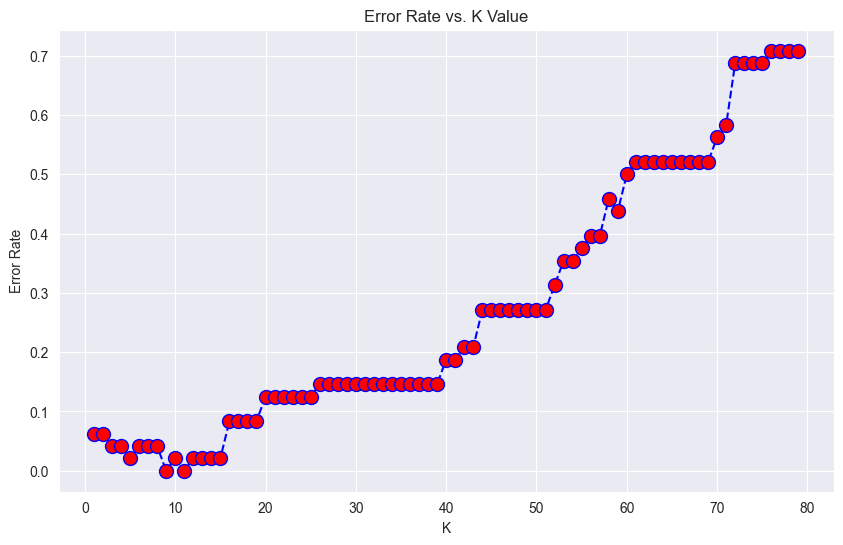

In [204]:
from sklearn.neighbors import KNeighborsClassifier

# Code to create the graph with Error Rate vs. K-values.
error_rate=[]
for i in range(1,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled, y_train)
    pred_i = knn.predict(X_testScaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,80),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**<span style ='background:yellow'>\<explain the result and your choice for k based on the graph></span>**

*Note:* +0.5 if you also use the GridSearch technique to decide on k.

in the graph we can see that the best k will probably be around 15, but is could also be somewhere between 20 and 40 so i will do a grid search to find the best k.

In [205]:
# code to use the GridSearch technique to decide on k.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Define a dictionary of parameters to search over
param_grid = {'n_neighbors': range(1, 40)}

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier()

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_trainScaled, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_neighbors': 2}
Best score:  0.953306342780027


it looks like the best k is 2 has the best results i will now test that with my test data.

Now that we know what we want k to be, we can create the model.

In [206]:
# code to create the model with the selected k
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_trainScaled, y_train)
y_pred = knn.predict(X_testScaled)

Lets find out how good it is:

accuracy score: 0.9375


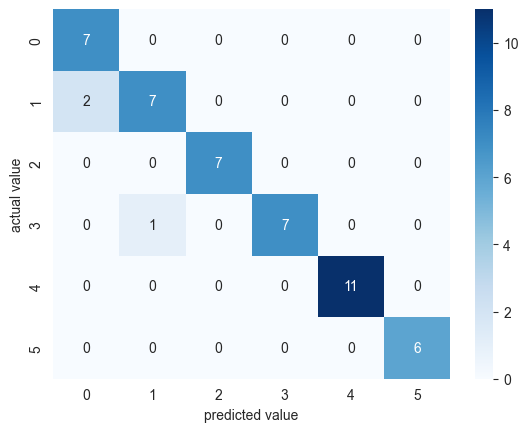

In [207]:
# code to show its accuracy score AND confusion matrix.
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
# The confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, and the SVM kernels?></span>**

the accuracy of this model is 0.938 or 93.8% this is a very good result and is better than all the other models. the confusion matrix shows that it can predict all the labels very well. this can also be concluded from the diagonal line in the confusion matrix. however it does seem that is somtimes confuses class 0, and 1. but this was to be expected because the x variables used for the prediction are very close to each other for class 1 and 2. the value gap between the classe becomes exponentially bigger so class 3,4 and 5 should be easier to distinguish.

In [208]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.88      0.78      0.82         9
           2       1.00      1.00      1.00         7
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



One more basic technique to go.

## 2.4. Decision Trees
The last technique that was discussed in detail, were the Decision Trees.

**<span style ='background:yellow'>\<explain briefly in your own words how a Decision Tree method works></span>**
The Decision Tree algorithm is a machine learning technique that can be used for classification . It works by making a tree-like model (i like to thiunk of it like a  lot of if statements) of decisions and their possible consequences. We give it our x variables and our y variable and it will try to find the best way to split the data into the different classes. it will do this by looking at the x variables and splitting the data multiple times to try and assign them to their corresponding  y variable.

The following variations were discussed:

* ID3 (or entropy with sklearn)
* Gini
* Random Forest
* Extra trees

Hopefully we have the hang of this now, so lets do each of them in one go:

ID3
accuracy score: 0.5625


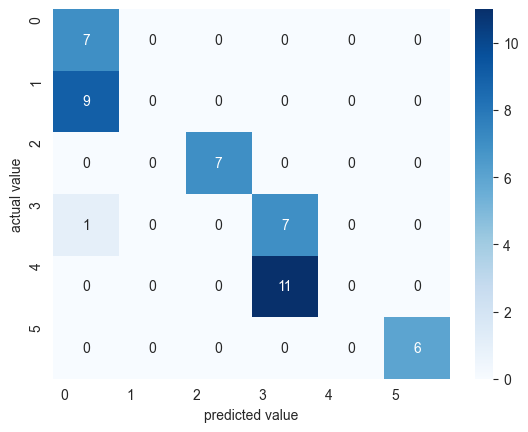

entropy with sklearn
accuracy score: 0.9375


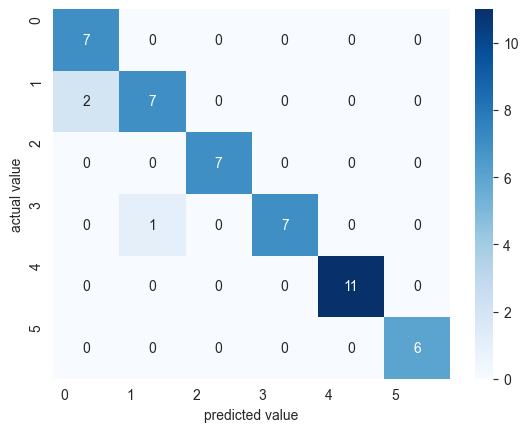

gini
accuracy score: 0.9375


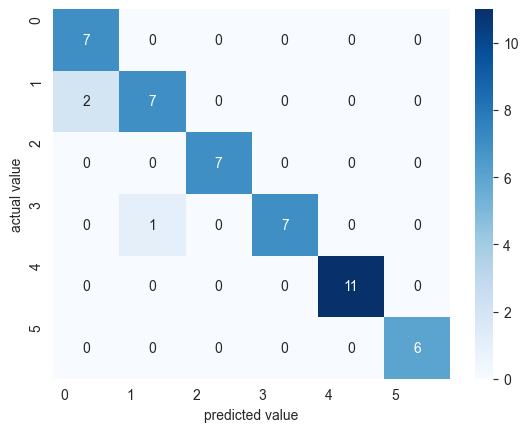

random forest
accuracy score: 0.9375


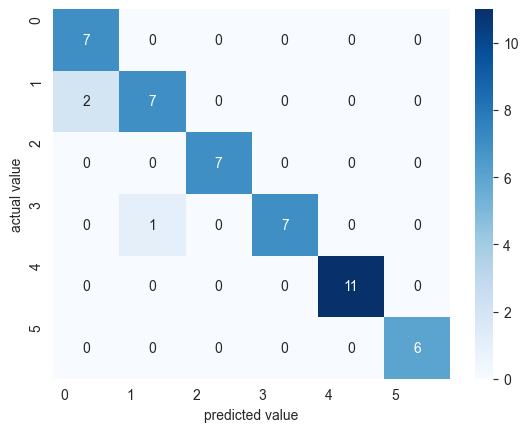

extra trees
accuracy score: 0.9583333333333334


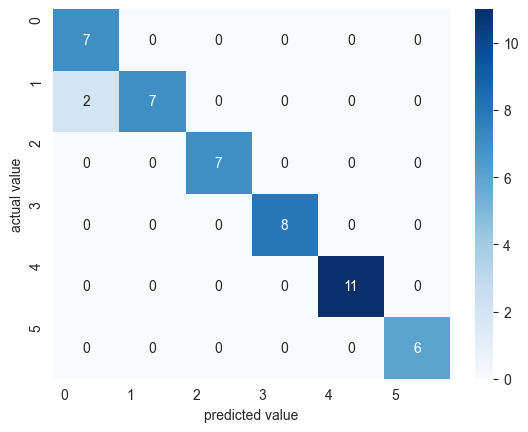

In [209]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.
print ('ID3')
# importing it directly seems to have a small bug, so
# first import six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six
# then finally id3
from id3 import Id3Estimator

id3_dtc=Id3Estimator()
id3_dtc.fit(X_trainScaled,y_train)
y_pred = id3_dtc.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print ('entropy with sklearn')
from sklearn.tree import DecisionTreeClassifier

ent_dtc = DecisionTreeClassifier(criterion = "entropy")
ent_dtc.fit(X_trainScaled,y_train)
y_pred = ent_dtc.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print ('gini')
gini_dtc = DecisionTreeClassifier(criterion = "gini")
gini_dtc.fit(X_trainScaled,y_train)
y_pred = gini_dtc.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print ('random forest')
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfcModel = rfc.fit(X_trainScaled, y_train)
y_pred = rfcModel.predict(X_testScaled)

print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print ('extra trees')
from sklearn.ensemble import ExtraTreesClassifier

# Extremly Random Forest (a.k.a. Extra trees)
erfc = ExtraTreesClassifier(random_state=0)
erfc = erfc.fit(X_trainScaled, y_train)
y_pred = erfc.predict(X_testScaled)

print('accuracy score:', metrics.accuracy_score(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

**<span style ='background:yellow'>\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, the SVM kernels, and the knn?></span>**

id3 performs the least well of all of those models. the acuracy is 0.563 or 56.3% accurate. from the confusion matrix is can see tat is does not predict class 1 and 4.

for some reason entropy with sklearn, gini and random forest all have the same accuracy score of 0.938 or 93.8% accurate. this makes it just as accurate as the knn model. what also surprised me is that the confusion matrix for all of them is the same. this means that they all predict the same classes. from the confusion matrix i can also see that it performs really well because there is a clear diagonal line from the top left to the bottom right.

the extra trees model performs the bes of all models up until this point wit han accuracy of 0.958 or 95.8% accurate. in the confusion matrix is can see a clear diagonal line from the top left to the bottom right. i can also see that again it is confusion class o with class 1. but like i said before those values are close together, so it is not surprising that it makes some mistakes there.

One last set of techniques to explore.

## 2.5. Other Models
In the Jupyter Notebook from the lecture, in chapter 5.4 a few more techniques were simply shown:

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking

Out of curiousity lets see how these perform.

Linear Discriminant Analysis
accuracy score: 0.5833333333333334


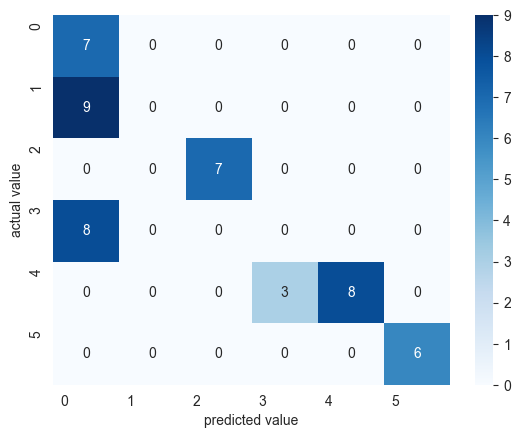

Quadratic Discriminant Analysis
accuracy score: 0.5833333333333334


C:\Users\jaimy\anaconda3\envs\stats-Classification\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


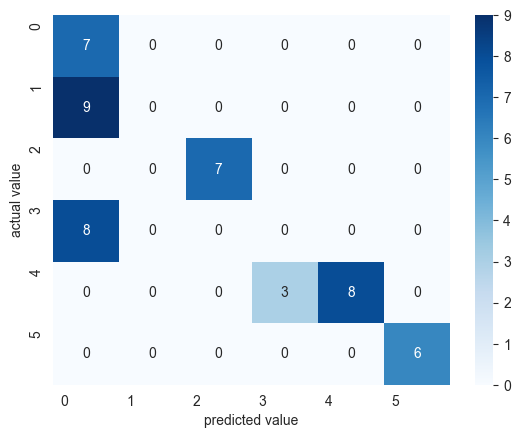

Logistic Regression Classifier
accuracy score: 0.4791666666666667


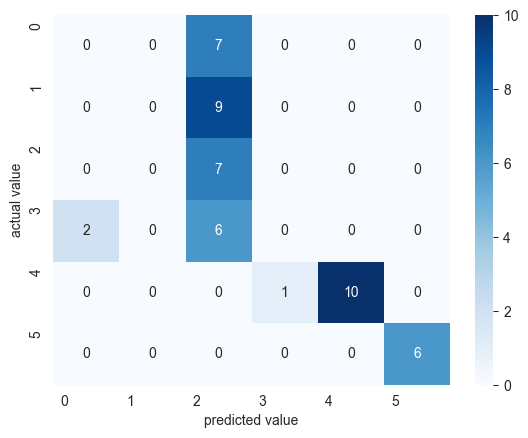

Multinomial Logistic Regression Classification
accuracy score: 0.4791666666666667


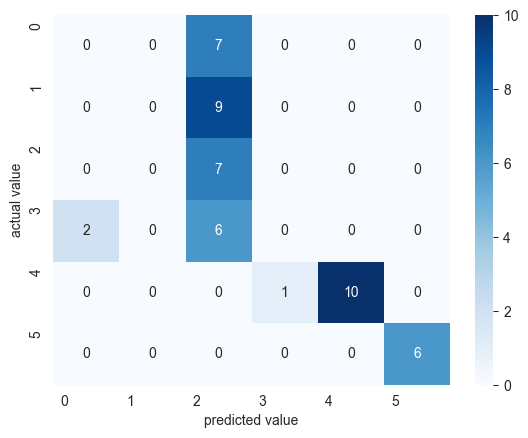

Adaptive Boosting
accuracy score: 0.4166666666666667


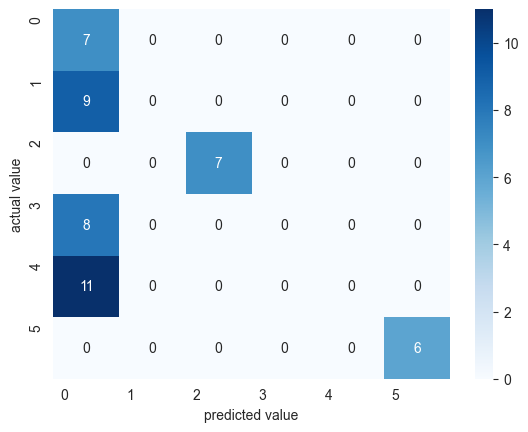

Gradient Boosting
accuracy score: 0.9375


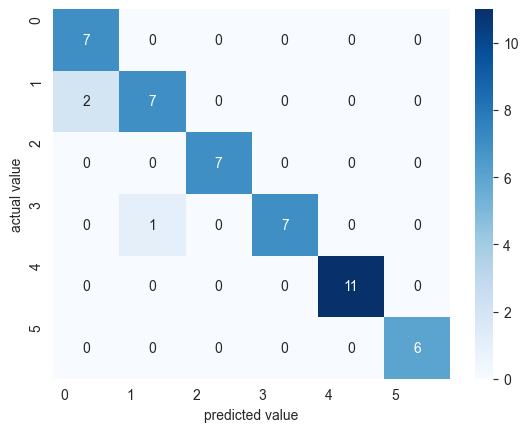

Histogram Gradient Boosting
accuracy score: 0.9375


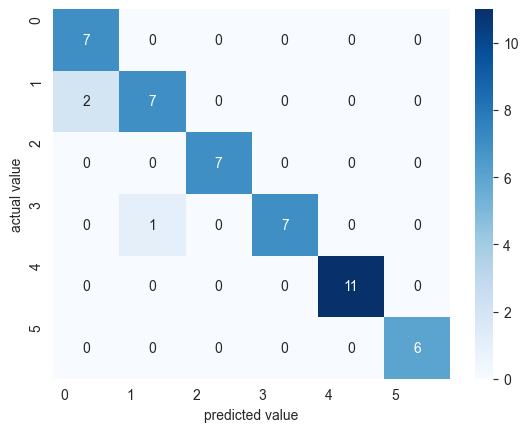

XGBoost
accuracy score: 0.9583333333333334


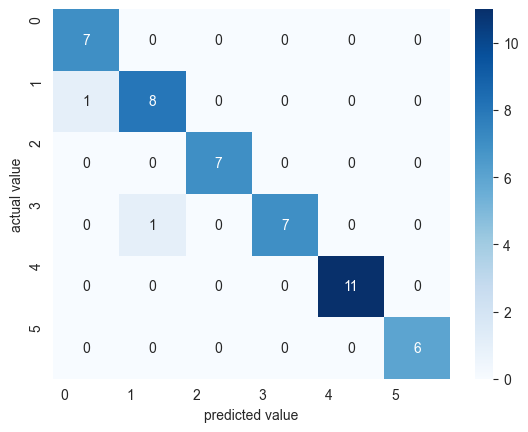

stacking 
accuracy score: 0.9375


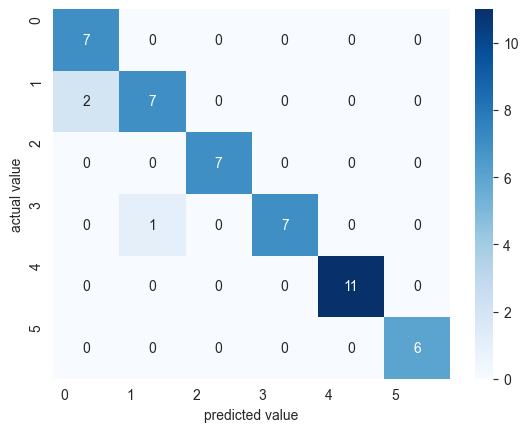

In [210]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.
print('Linear Discriminant Analysis')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
ldaModel=lda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print('Quadratic Discriminant Analysis')
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qdaModel=qda.fit(X_trainScaled, y_train)
y_pred=ldaModel.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print('Logistic Regression Classifier')
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print('Multinomial Logistic Regression Classification')
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial')
lrModel = logreg.fit(X_trainScaled, y_train)
y_pred = lrModel.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print('Adaptive Boosting')
from sklearn.ensemble import AdaBoostClassifier

adaBst = AdaBoostClassifier(random_state=0)
adaBst = adaBst.fit(X_trainScaled, y_train)
y_pred = adaBst.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print('Gradient Boosting')
from sklearn.ensemble import GradientBoostingClassifier

gradBst = GradientBoostingClassifier(random_state=0)
gradBst = gradBst.fit(X_trainScaled, y_train)
y_pred = gradBst.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print('Histogram Gradient Boosting')
from sklearn.ensemble import HistGradientBoostingClassifier

histBst = HistGradientBoostingClassifier(random_state=0)
histBst = histBst.fit(X_trainScaled, y_train)
y_pred = histBst.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print("XGBoost")
import xgboost as xgb
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

print('stacking ')
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]

stackCl = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stackCl.fit(X_trainScaled, y_train)
y_pred = stackCl.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, labels)
plt.yticks(np.arange(k)+1/k, labels)
plt.show()

**<span style ='background:yellow'>\<which performed best?></span>**
XGBoost performed the best
accuracy score: 0.9583333333333334
it is a tie between XGBoost and extra trees the both have the same accuracy score

<font size="5"><center>-----Chapters 1 and 2 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 3. Visualisation

With two input parameters we can actually determine visually where a model will classify a variable into which category. An overview of such plots is shown at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

We cannot copy that code since it does a comparison. What we want is a function that takes the X and Y data as input, as well as the model to be used and then shows the decision areas.

In [211]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
                         np.linspace(y_min, y_max, 10))

    # Make predictions on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors='black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

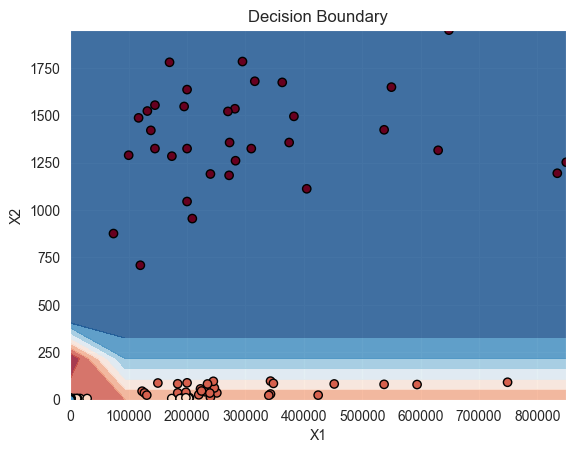

In [212]:
# an example of using the function
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
plot_decision_boundary(model, X_train, y_train)

# 4. Categorical Input
With classification we have a categorical output variable, but what if we also have one or more categorical input variables.

One popular technique is one-hot-encoding, but there are others.

In this chapter we'll discuss **<span style ='background:yellow'>\<your chosen technique></span>**.

**<span style ='background:yellow'>\<explain the technique in detail. What does it do and how does it work></span>**

i used one hot encoding. i encoded the categorical column color and then combined it with the numerical columns L and R. i One hot encoding turns the categorical data in to numerical data. it does this by creating a new column for each unique value in the categorical data. it then fills the new column with 1 if the value in the row is the same as the column name and 0 if it is not.

this makes the categorical data usable in the model.

Accuracy: 0.98


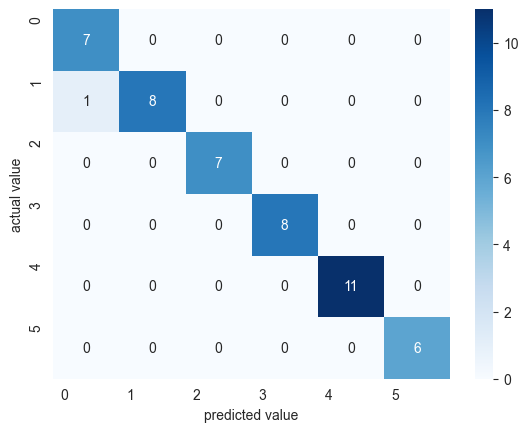

In [213]:
# example code of using this technique
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# get the categorical data and one-hot-encode it
cat_cols = ["Color"]
encoder = OneHotEncoder(handle_unknown="ignore")
encoded = encoder.fit_transform(data[cat_cols])

# get the numerical data and combine it with the one-hot-encoded data
numerical_cols = data[['L', 'R']].values
X = np.hstack((numerical_cols, encoded.toarray()))

# get the labels and encode them
le = LabelEncoder()
labels = le.fit_transform(data["Type"])
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = ExtraTreesClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# plot the confusion matrix
k = len(np.unique(y))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.xticks(np.arange(k)+1/k, le.inverse_transform(np.arange(k)))
plt.yticks(np.arange(k)+1/k, le.inverse_transform(np.arange(k)))
plt.show()

the extra trees classifier had the highest accuracy score of 0.9583333333333334  it was a tie between the extra trees classifier and the XGBoost classifier, but now the model did improve by adding the color column. it is now 0.98% accurate. and in the confusion matrix i can see that it only made one mistake.

In [214]:
# take a look at the data
X_train

array([[1.00000e+05, 1.28900e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.94903e+05, 1.78300e+03, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.40000e-04, 9.18000e-02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [7.40000e+04, 8.76000e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.00000e+05, 8.90000e+01, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.30000e+05, 1.31500e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

we can see that the one hot encoding added a column for each unique value in the color column. the values in the columns are 1 if the value in the row is the same as the column name and 0 if it is not.

# 5. Performance
Some models get higher accuracy scores than others. In the Jupyter Notebook from the lecture the UFC data was used and the QDA had the highest accuracy score: 0.6747. The big question is, can it be done better? First areas to look for improvement are to simply increase the number of input variables, or tweak some parameters of some of the models, or a combination of both.

In this chapter we'll give it an attempt.

First we need to load the data:

**<span style ='background:yellow'>\<explain your attempt, what did you do.></span>**

# 6. A New Technique

Many techniques were discussed in class and the lecture Jupyter Notebook, but there are a lot more. In this chapter the \<your chosen new technique> is discussed.

**<span style ='background:yellow'>\<explain in detail this new technique. Note that other students should be able to understand it from your explanation alone!></span>**

In [215]:
# code on using this technique


**<span style ='background:yellow'>\<feel free to use more cells for this, you probably need them></span>**